# Convolution and Polling
полезные ссылки:
- https://youtu.be/vVaRhZXovbw
- https://androidkt.com/explain-pooling-layers-max-pooling-average-pooling-global-average-pooling-and-global-max-pooling/
---
---

# Convolution
----

## 1. Conv1D vs Conv2D vs Conv3D
---

#### Conv1D (фильтр/ядро скользит в одном измерении)
- Conv1D фиксирует только одну из двух корреляций (вертикальную или горизонтальную), что дает гораздо более ограниченную информацию.
![-](data/conv1d_il.jpg)
----
#### Conv2D (фильтр/ядро скользит в двух измерениях)
- Conv2D может быть "разложен" на два блока Conv1D, объединение вертикального Conv1D и горизонтального Conv1D фиксирует пространственную корреляцию по обеим осям. Это приемлемый подход к классификации изображений в качестве альтернативы Conv2D.
![-](data/conv2d_il.gif)
----
#### Conv3D (фильтр/ядро скользит в трех измерениях)
- Conv3D в основном используется с данными трехмерного изображения. Такие какМагнитно-резонансная томография(МРТ) данные. Данные МРТ широко используются для исследования головного мозга, спинного мозга, внутренних органов и многих других.Компьютерная томография(КТ) Сканирование также является примером трехмерных данных, которые создаются путем объединения серии рентгеновских изображений, полученных под разными углами вокруг тела. Мы можем использовать Conv3D для классификации этих медицинских данных или извлечения из них функций.
![-](data/conv3d_il.png)
----
### Вывод:
Одной из задач свертки является показать зависимость соседних клеток, которые и формируют картинку. 1D Convolution не подойдет, потому что такой вариант свертки покажет зависимость соседних пикселей только в одной оси. 3D Convolution не уместен для данного датасета, потому что у нас изображения размером (32, 32, 3). 2D Convolution лучше всего подходит для классификации rgb изображений
### `В проекте используем только 2D Convolution`
----
----

## 2. Convolution types
----

### Simple Convolution
[tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

![](data/conv2d1.gif)
![](data/conv2d2.gif)

Много рассказывать про данный вариант свертки не буду, мы использовали его в семинарах

Можно сказать, что такой вариант свертки показал себя хорошо на датасете mnist, который очень отдальенно напоминает svhn.

#### `Такой вариант свертки мы будем использовать`

----

### Transpose Convolution
[tf.keras.layers.Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose)

![-](data/convtranspose.jpg)

Данный вариант свертки увеличивает входные данные с помощью фильтра, размер которого больше входного слоя.

В интернете не нашел ни один вариант использования данной свертки без других типов convolution. Как я понял, такая свертка является доплнительным инстурментом.

Примером является U-net.

### `Использовать будем, но при дальнейшем изучении skip-connection и U-net подобных сетей`
----

### Convolution LSTM
[tf.keras.layers.ConvLSTM2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ConvLSTM2D)

#### Сетевая структура, способная улавливать пространственно-временные корреляции, а именно ConvLSTM. В Keras это отражено в классе ConvLSTM2D, который вычисляет сверточные операции как во входных данных, так и в рекуррентных преобразованиях.
Это больше используется для видео (временная корреляция изображений)
#### `Мы это использовать не будем`
----

### Depthwise Convolution
[tf.keras.layers.DepthwiseConv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/DepthwiseConv2D)

![-](data/depthwise_conv.gif)

Для svhn данный вариант свертки будет работать так:
- Каждый входящий слой (глубина каждого цвета) будет делиться на три отдельных слоя
- Для каждого слоя будет создан фильтр размера (n, n, 1)
- Каждый входной слой будет "прогоняться" через свой фильтр

Плюсы:
- Уменьшаем кол-во вычеслений (сильно)
- Хорошо показываем зависимость соседних пикселей

Минусы:
- Мы не учитываем зависимость между слоями

#### `Проверим на практике работоспособность такого варианта свертки`
----

### Separable Convolution
[tf.keras.layers.SeparableConv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SeparableConv2D)

![-](data/separable_conv.gif)

Для svhn данный вариант свертки будет работать так:
- Каждый входящий слой (глубина каждого цвета) будет делиться на три отдельных слоя
- Для каждого слоя будет создан фильтр размера (n, n, 1)
- Каждый входной слой будет "прогоняться" через свой фильтр
- Далее все образоваашиеся слои будут "прогоняться" через Pointwise Convolution (точечная свертка)

Плюсы:
- Уменьшаем кол-во вычеслений (примерно в 9 раз!!!)
- Хорошо показываем зависимость соседних пикселей
- Мы учитываем зависимость между слоями

Минусы:
- Не заметил

То есть такой вариант свертки также хорош как и Depthwise Conv, однако он исключает его минусы. 
#### `Проверим на практике работоспособность такого варианта свертки`
----

### Типы сверток, которые мы будем проверять на практике:
     - Conv2D
     - DepthwiseConv2D
     - SeparableConv2D
- `Conv2DTranspose` (но не в этом ноуте)
----
----

# Pooling 
- Подобно сверточному слою, пулинговый слой необходим для уменьшения размера свернутого элемента в пространстве. Это помогает уменьшить вычислительную мощность, необходимую для обработки данных, за счет уменьшения размерности.
---

По аналогии со сверкой, мы отказываемся от 1D Pooling и 3D Pooling

----
### Average Pooling
[tf.keras.layers.AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)

![-](data/avgpool.jpg)

Отражает средние значения пикселей, из выборки pool_size
 
- Минимальое искажение изображения

----
### Max Pooling
[tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

![-](data/maxpool.png)

Показывает максимальное значения пикселей, из выборки pool_size

- Показывает выделяющиеся фичи, однако искажает изображение

----
### Global Average Pooling
[tf.keras.layers.GlobalAveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D)

![-](data/globalavgpool.png)

Показывает средние значения пикселей, из входящего слоя

----
### Global Max Pooling
[tf.keras.layers.GlobalMaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D)

![-](data/globalmaxpool.jpg)

Показывает средние значения пикселей, из входящего слоя

----
- Avg vs Max:

        Ничего сказать не могу, оба варианта стоит посмотреть на практике

- Base vs Global:

        Base уже показывал себя хорошо во время семинаров. Global будет работать плохо, потому что после одного такого пулинга, мы теряем колоссальное кол-во данных (остатется всего по 1 значению от каждого слоя)


----
### Типы пулингов, которые мы будем проверять на практике:
     - AveragePooling2D
     - MaxPool2D
----
----

# Комбинации convolutions и polling на практике.
- Чекпоинты и проверку работы датасета на тестовой выборке делать не будем (чтоб не засорять ноут и директорию). Нам достаточно будет посмотреть на график метрик по трейновому и валидационному датасетах.
----

In [1]:
import pickle

import tensorflow as tf
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split

In [2]:
train_ds = pickle.load(open('data_train', 'rb'))
train_ds_x = train_ds['images'] / 255
train_ds_y = train_ds['labels']

In [3]:
batch_size = 512
train_ds_x, val_ds_x, train_ds_y, val_ds_y = train_test_split(train_ds_x, train_ds_y, test_size=0.1)

train_ds = tf.data.Dataset.from_tensor_slices((train_ds_x, train_ds_y))
train_ds = train_ds.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_ds = train_ds.batch(batch_size)

val_ds = tf.data.Dataset.from_tensor_slices((val_ds_x, val_ds_y))
val_ds = val_ds.batch(batch_size)

## 1. Conv2D + AveragePooling2D

In [4]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model1.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 64)         0

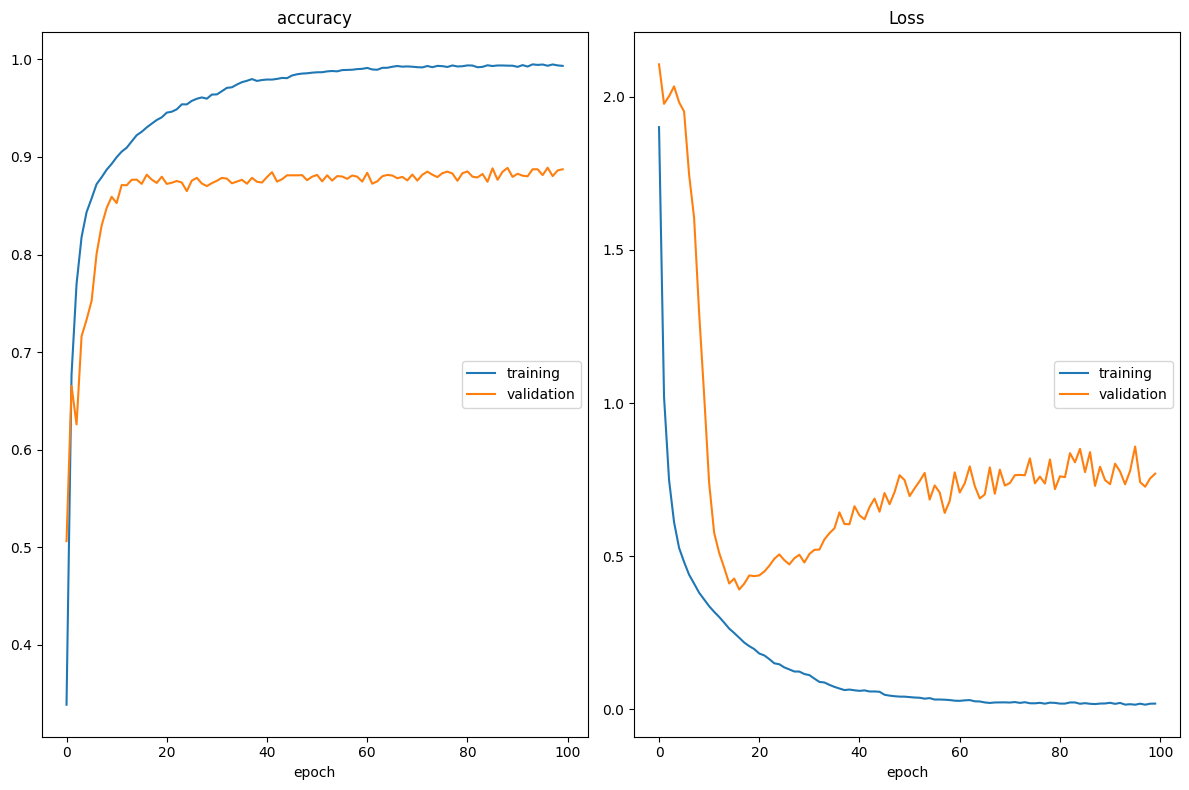

accuracy
	training         	 (min:    0.339, max:    0.995, cur:    0.993)
	validation       	 (min:    0.506, max:    0.889, cur:    0.887)
Loss
	training         	 (min:    0.015, max:    1.900, cur:    0.019)
	validation       	 (min:    0.391, max:    2.105, cur:    0.770)


In [5]:
model1.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)

## 2. Conv2D + MaxPool2D

In [6]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model2.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)        

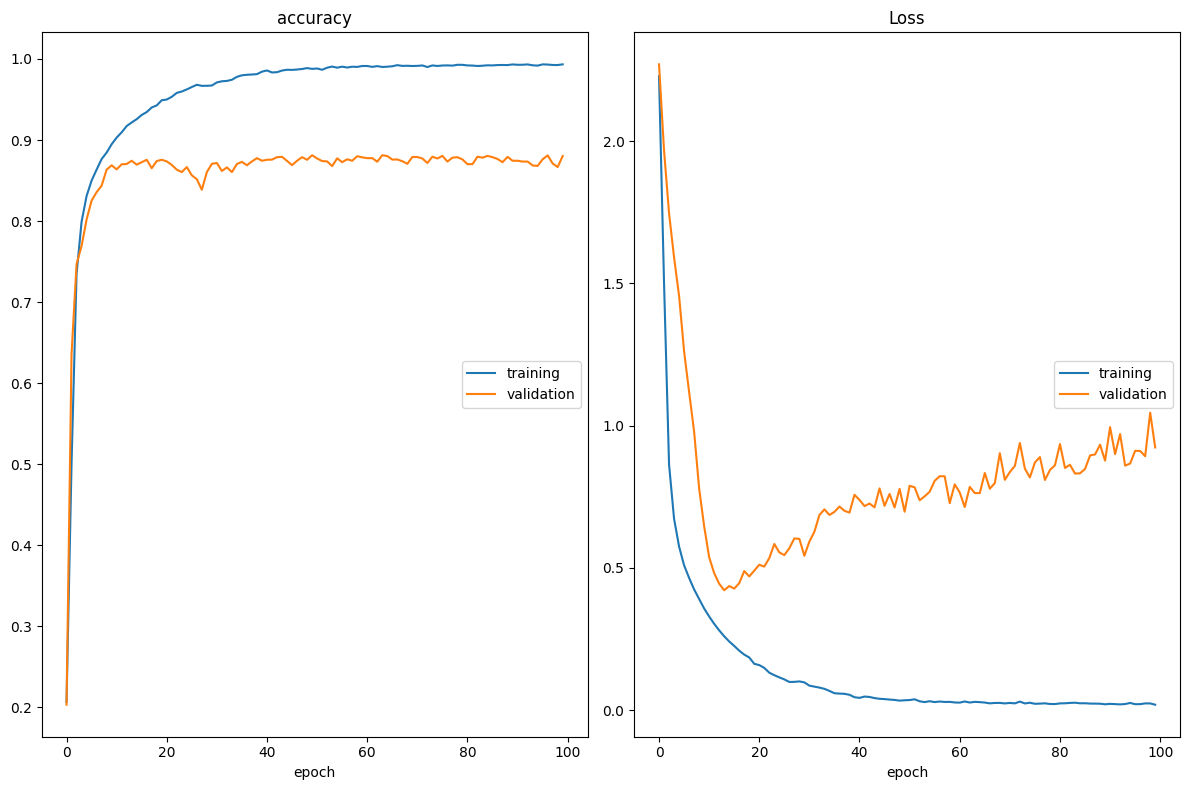

accuracy
	training         	 (min:    0.206, max:    0.993, cur:    0.993)
	validation       	 (min:    0.203, max:    0.881, cur:    0.880)
Loss
	training         	 (min:    0.019, max:    2.228, cur:    0.019)
	validation       	 (min:    0.421, max:    2.269, cur:    0.923)


In [7]:
model2.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)

## 3. DepthwiseConv2D + AveragePooling2D

In [4]:
model3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3), batch_size=batch_size),
    tf.keras.layers.DepthwiseConv2D(3, strides=1, activation='relu'),
    tf.keras.layers.DepthwiseConv2D(3, strides=1, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.DepthwiseConv2D(3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model3.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d (Depthwise  (512, 30, 30, 3)         30        
 Conv2D)                                                         
                                                                 
 depthwise_conv2d_1 (Depthwi  (512, 28, 28, 3)         30        
 seConv2D)                                                       
                                                                 
 batch_normalization (BatchN  (512, 28, 28, 3)         12        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (512, 14, 14, 3)         0         
 ooling2D)                                                       
                                                                 
 depthwise_conv2d_2 (Depthwi  (512, 14, 14, 3)         3

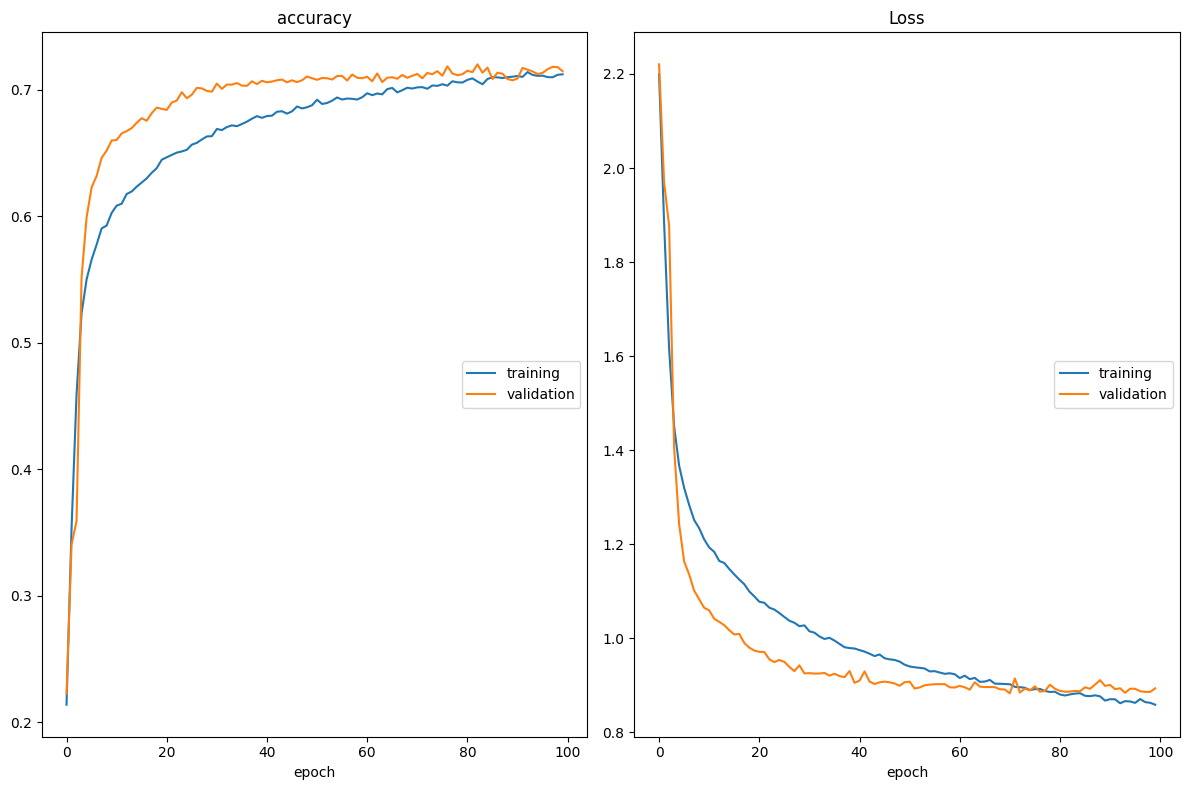

accuracy
	training         	 (min:    0.214, max:    0.714, cur:    0.712)
	validation       	 (min:    0.222, max:    0.720, cur:    0.715)
Loss
	training         	 (min:    0.859, max:    2.200, cur:    0.859)
	validation       	 (min:    0.883, max:    2.221, cur:    0.894)


In [5]:
model3.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)

## 4. DepthwiseConv2D + MaxPool2D

In [6]:
model4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3), batch_size=batch_size),
    tf.keras.layers.DepthwiseConv2D(3, strides=1, activation='relu'),
    tf.keras.layers.DepthwiseConv2D(3, strides=1, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.DepthwiseConv2D(3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model4.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d_3 (Depthwi  (512, 30, 30, 3)         30        
 seConv2D)                                                       
                                                                 
 depthwise_conv2d_4 (Depthwi  (512, 28, 28, 3)         30        
 seConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (512, 28, 28, 3)         12        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (512, 14, 14, 3)         0         
 )                                                               
                                                                 
 depthwise_conv2d_5 (Depthwi  (512, 14, 14, 3)        

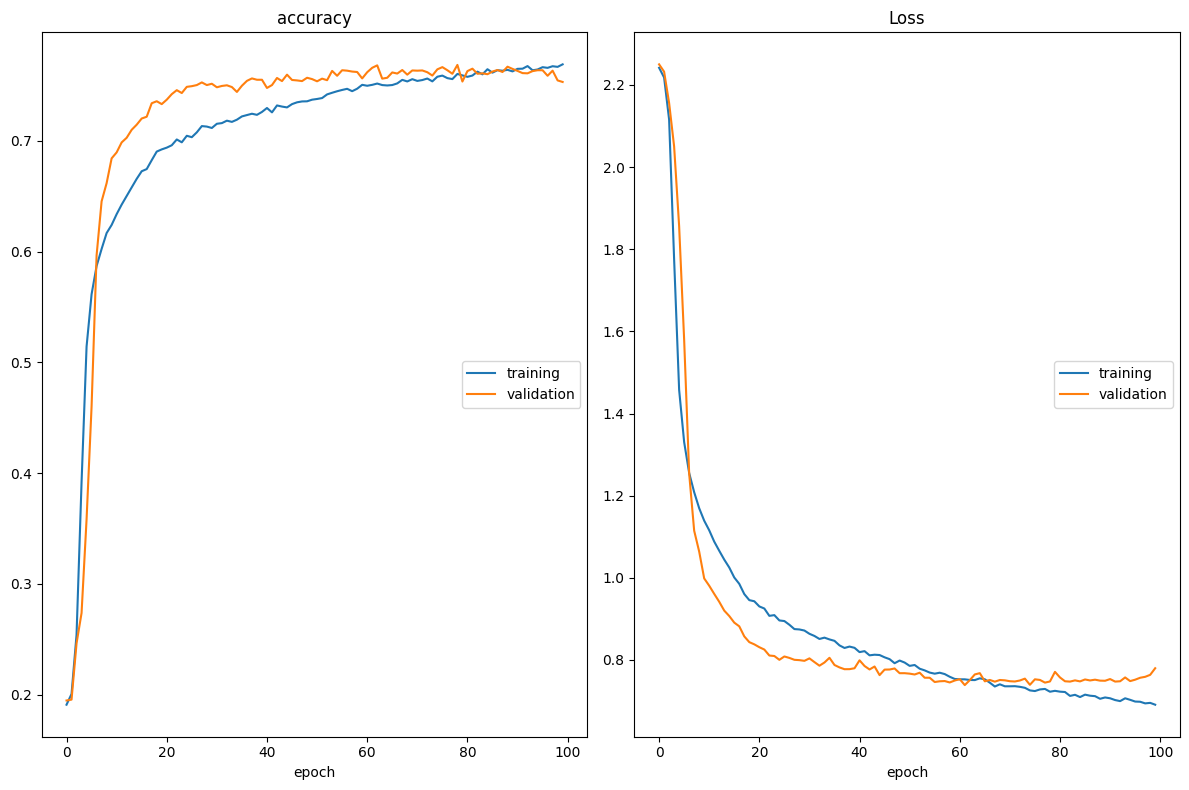

accuracy
	training         	 (min:    0.191, max:    0.769, cur:    0.769)
	validation       	 (min:    0.195, max:    0.769, cur:    0.753)
Loss
	training         	 (min:    0.691, max:    2.242, cur:    0.691)
	validation       	 (min:    0.739, max:    2.250, cur:    0.780)


In [7]:
model4.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)

## 5. SeparableConv2D + AveragePooling2D

In [ ]:
model5 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3), batch_size=batch_size),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model5.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (512, 30, 30, 64)        283       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (512, 28, 28, 64)        4736      
 leConv2D)                                                       
                                                                 
 batch_normalization (BatchN  (512, 28, 28, 64)        256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (512, 14, 14, 64)        0         
 )                                                               
                                                                 
 separable_conv2d_2 (Separab  (512, 12, 12, 64)        4

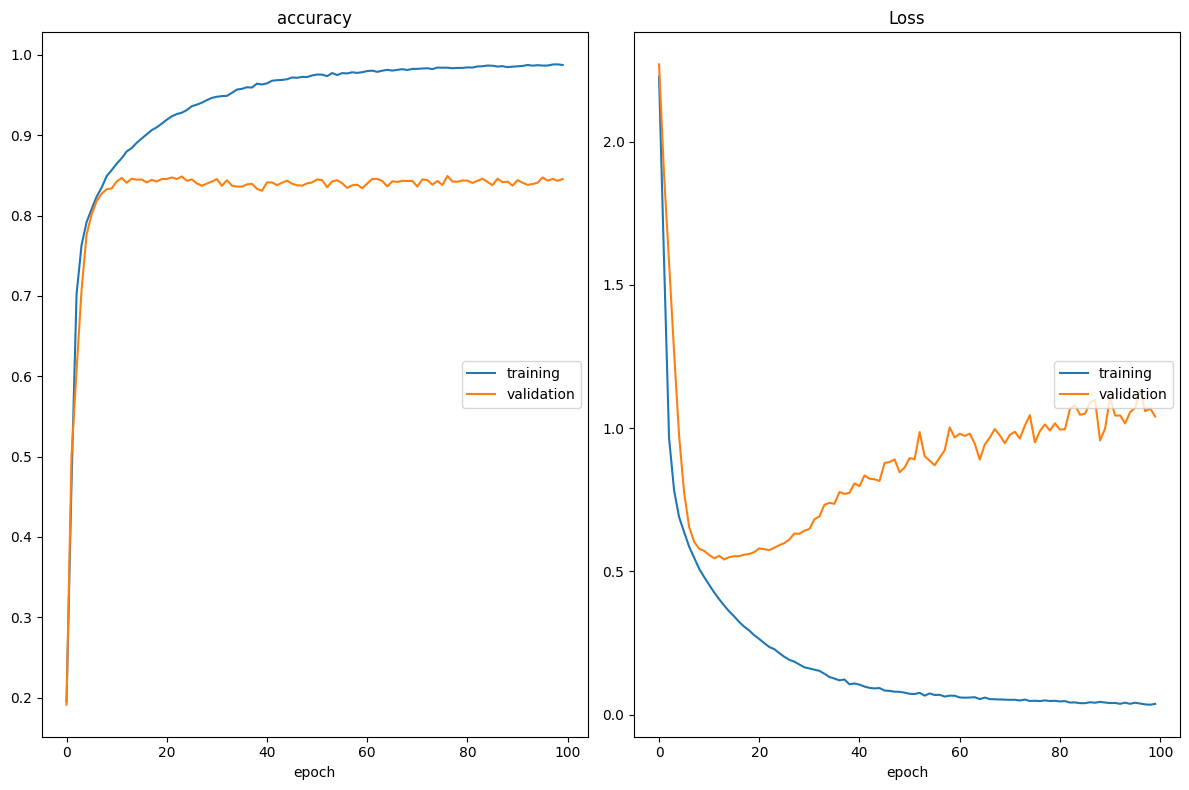

accuracy
	training         	 (min:    0.195, max:    0.988, cur:    0.987)
	validation       	 (min:    0.191, max:    0.849, cur:    0.845)
Loss
	training         	 (min:    0.035, max:    2.227, cur:    0.038)
	validation       	 (min:    0.542, max:    2.269, cur:    1.040)


In [5]:
model5.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)

## 6. SeparableConv2D + MaxPool2D

In [5]:
model6 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3), batch_size=batch_size),
    tf.keras.layers.SeparableConv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model6.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_3 (Separab  (512, 30, 30, 32)        155       
 leConv2D)                                                       
                                                                 
 separable_conv2d_4 (Separab  (512, 28, 28, 64)        2400      
 leConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (512, 28, 28, 64)        256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (512, 14, 14, 64)        0         
 2D)                                                             
                                                                 
 separable_conv2d_5 (Separab  (512, 12, 12, 64)       

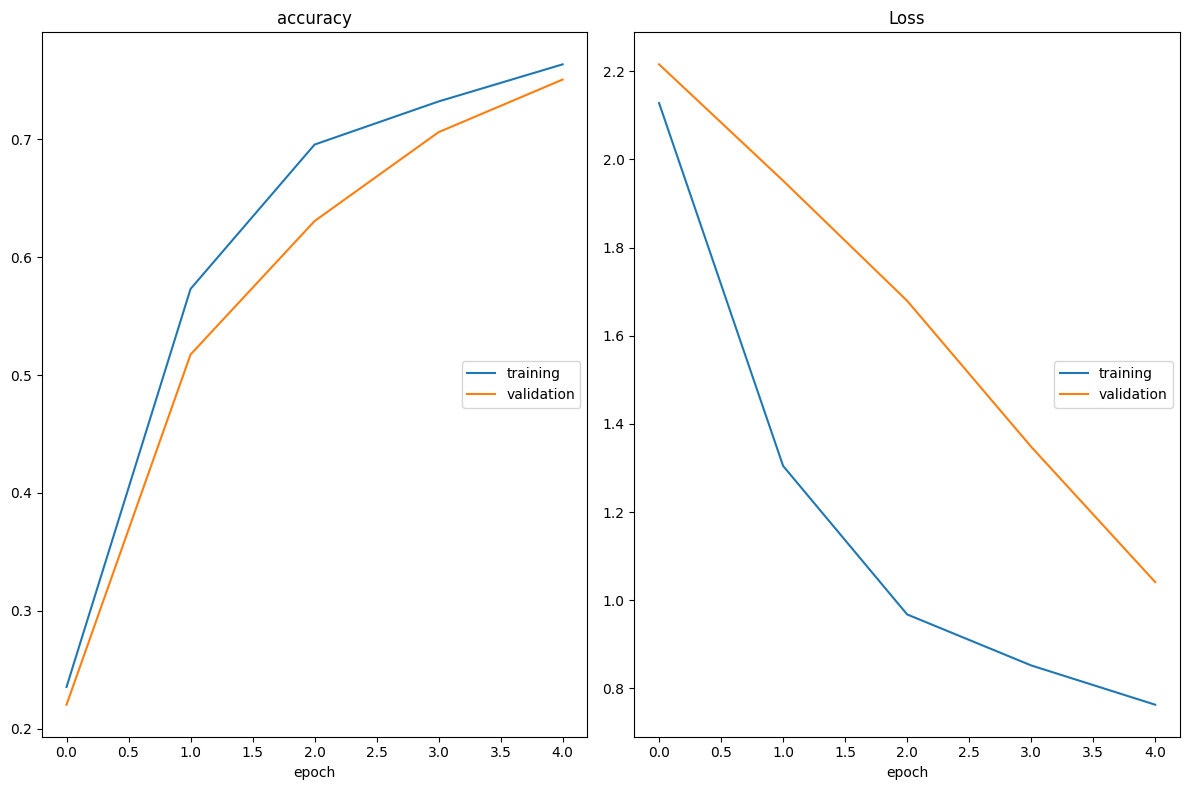

accuracy
	training         	 (min:    0.235, max:    0.764, cur:    0.764)
	validation       	 (min:    0.220, max:    0.751, cur:    0.751)
Loss
	training         	 (min:    0.763, max:    2.128, cur:    0.763)
	validation       	 (min:    1.041, max:    2.216, cur:    1.041)


In [6]:
model6.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)

In [4]:
model7 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3), batch_size=batch_size),
    tf.keras.layers.SeparableConv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model7.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (512, 30, 30, 32)        155       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (512, 28, 28, 64)        2400      
 leConv2D)                                                       
                                                                 
 batch_normalization (BatchN  (512, 28, 28, 64)        256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (512, 14, 14, 64)        0         
 )                                                               
                                                                 
 separable_conv2d_2 (Separab  (512, 12, 12, 64)        4

In [ ]:
model7.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)